In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('train.csv',parse_dates=['Date'])

In [4]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [6]:
df['Date'].describe()

count                  421570
unique                    143
top       2011-12-23 00:00:00
freq                     3027
first     2010-02-05 00:00:00
last      2012-10-26 00:00:00
Name: Date, dtype: object

In [7]:
max(df.Date)-min(df.Date)

Timedelta('994 days 00:00:00')

In [8]:
df['Weekno']=df['Date'].dt.week
df['year'] = df['Date'].dt.year

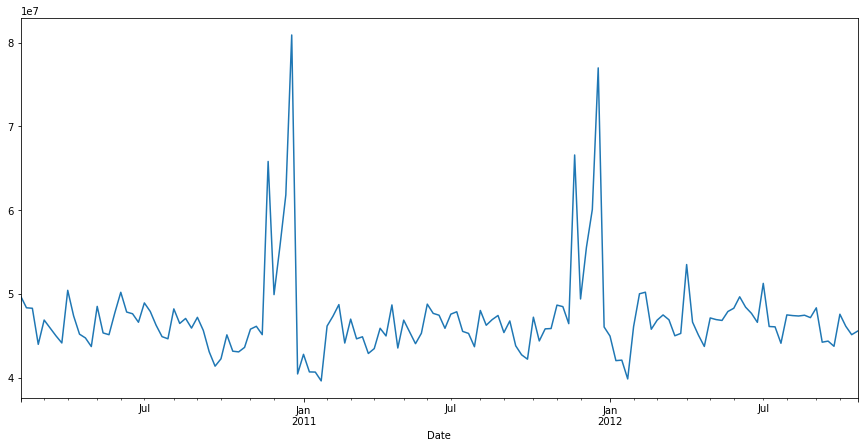

In [12]:
plt.subplots(figsize=(15,7))
df.groupby('Date').Weekly_Sales.sum().plot()

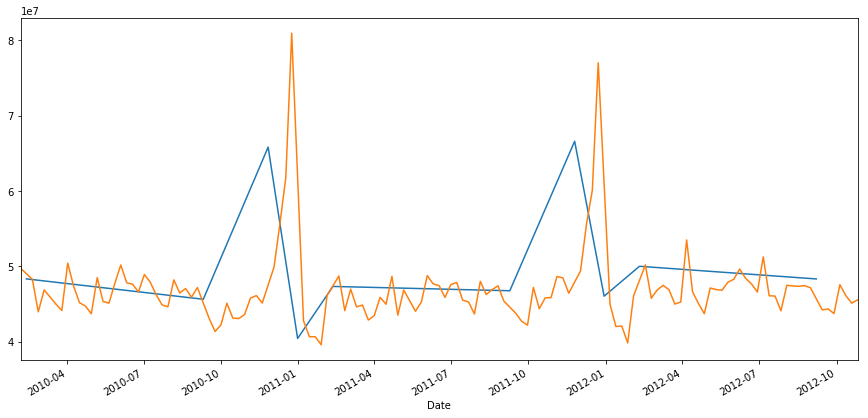

In [9]:
plt.subplots(figsize=(15,7))
df[df['IsHoliday']==True].groupby('Date').Weekly_Sales.sum().plot()
df[df['IsHoliday']==False].groupby('Date').Weekly_Sales.sum().plot()

In [13]:
df.Store.nunique()

45

In [14]:
df.Dept.nunique()

81

In [15]:
store=pd.read_csv('stores.csv')

In [16]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [17]:
df=df.merge(store,left_on='Store',right_on='Store',how='left')

In [18]:
df['key'] = (df.Store + df.Date).astype(str)

In [19]:
features = pd.read_csv('features.csv',parse_dates=['Date'] )

In [20]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [21]:
features['key'] = (features.Store + features.Date).astype(str)

In [22]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 13 columns):
Store           8190 non-null int64
Date            8190 non-null datetime64[ns]
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
key             8190 non-null object
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 775.9+ KB


In [23]:
df=df.merge(features,left_on='key',right_on='key',how='left')

In [24]:
df=df.drop(['Store_y','Date_y','IsHoliday_y','key'],1)

In [25]:
df=df.rename({'Store_x' : 'Store' ,'Date_x': 'Date' , 'IsHoliday_x' : 'IsHoliday'},axis=1)

In [26]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Weekno,year,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,5,2010,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,6,2010,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,7,2010,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,8,2010,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,9,2010,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


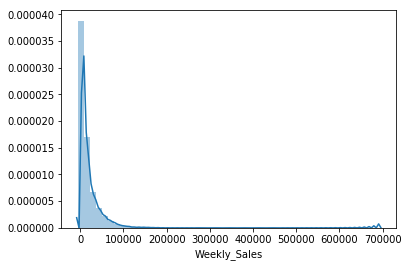

In [27]:
sns.distplot(df.Weekly_Sales)

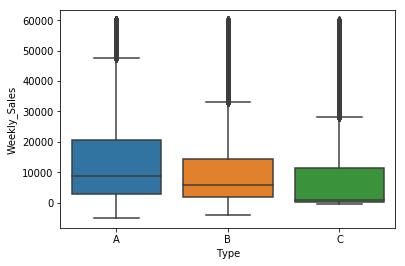

In [28]:
sns.boxplot(x=df[df['Weekly_Sales']<60000].Type,y=df[df['Weekly_Sales']<60000].Weekly_Sales)

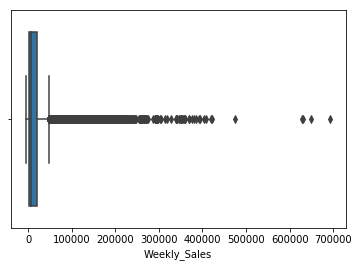

In [29]:
sns.boxplot(df.Weekly_Sales)

In [30]:
df[df['Weekly_Sales']>500000]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Weekno,year,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
95373,10,72,2010-11-26,693099.36,True,47,2010,B,126512,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003
95425,10,72,2011-11-25,630999.19,True,47,2011,B,126512,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874
337961,35,72,2010-11-26,627962.93,True,47,2010,B,103681,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763
338013,35,72,2011-11-25,649770.18,True,47,2011,B,103681,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745


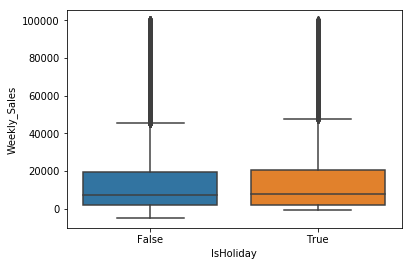

In [31]:
sns.boxplot(x=df[df['Weekly_Sales']<100000].IsHoliday,y=df[df['Weekly_Sales']<100000].Weekly_Sales)

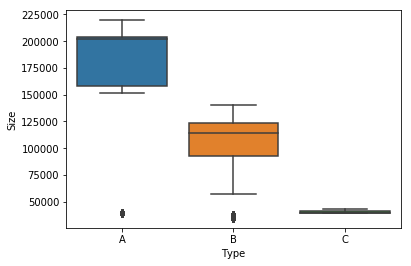

In [32]:
sns.boxplot(x=df.Type,y=df.Size)

In [33]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Weekno               0
year                 0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [36]:
df.fillna(df['MarkDown1'].median(),inplace=True)
df.fillna(df['MarkDown2'].median(),inplace=True)
df.fillna(df['MarkDown3'].median(),inplace=True)
df.fillna(df['MarkDown4'].median(),inplace=True)
df.fillna(df['MarkDown5'].median(),inplace=True)

In [37]:
fea_list=df.select_dtypes(include=['float64']).columns.tolist()

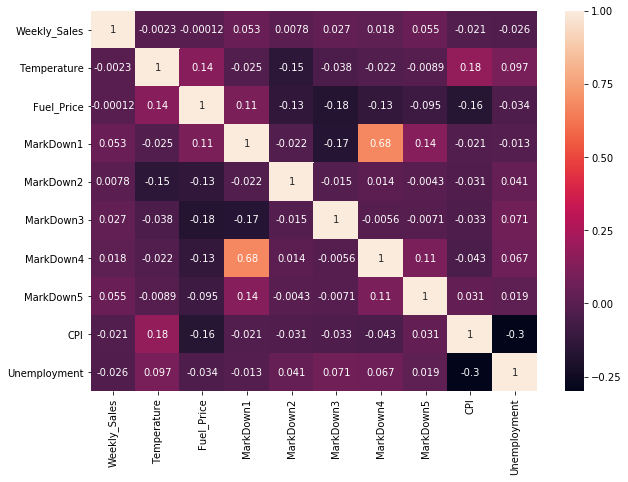

In [38]:
plt.subplots(figsize=(10,7))
sns.heatmap(df[fea_list].corr(),annot=True)

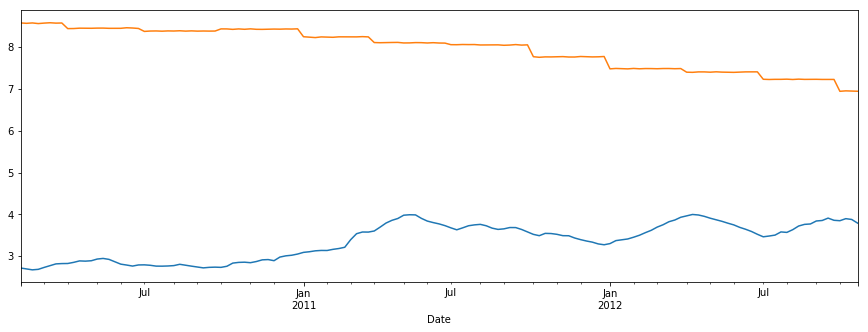

In [39]:
plt.subplots(figsize=(15,5))
df.groupby('Date').Fuel_Price.mean().plot()
df.groupby('Date').Unemployment.mean().plot()                   

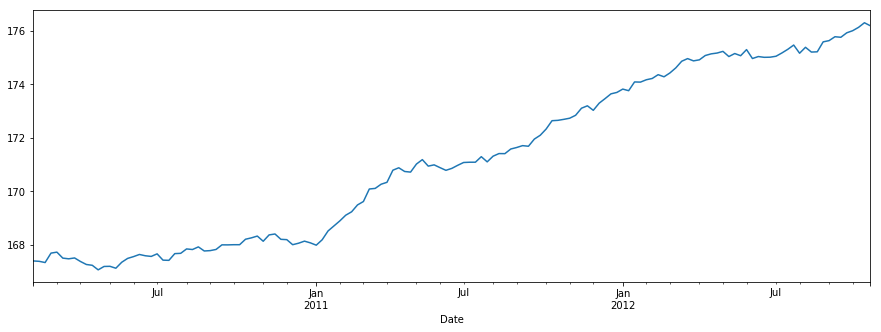

In [40]:
plt.subplots(figsize=(15,5))
df.groupby('Date').CPI.mean().plot()

In [41]:
df[['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].describe()

,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,15981.258123,6026.195471,4816.287079,4076.592133,4718.578842,5089.366896
std,22711.183519,5039.770624,4947.676311,5784.915590,3676.400085,3590.380551
min,-4988.940000,0.270000,-265.760000,-29.100000,0.220000,135.160000
25%,2079.650000,5347.450000,5347.450000,115.390000,3915.290000,4876.340000
50%,7612.030000,5347.450000,5347.450000,5347.450000,5347.450000,5347.450000
75%,20205.852500,5347.450000,5347.450000,5347.450000,5347.450000,5347.450000
max,693099.360000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000


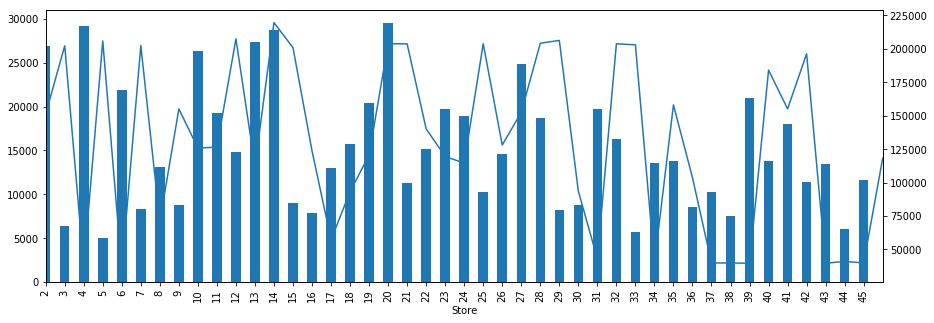

In [44]:
fig, ax=plt.subplots(figsize=(15,5))
ax2 = ax.twinx()
df.groupby('Store').Weekly_Sales.mean().plot(kind='bar',ax=ax)
df.groupby('Store').Size.mean().plot(ax=ax2)

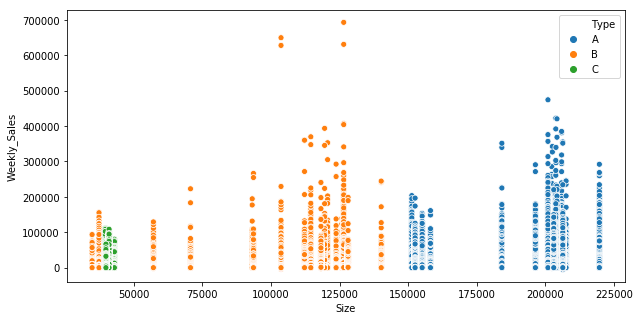

In [45]:
plt.subplots(figsize=(10,5))
sns.scatterplot( x = df.Size , y = df.Weekly_Sales, hue=df.Type)

In [51]:
ts=df.groupby('Date').Weekly_Sales.sum()

In [54]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean()
    rolstd = timeseries.rolling( window=52).std()

    #Plot rolling statistics:
    plt.subplots(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)


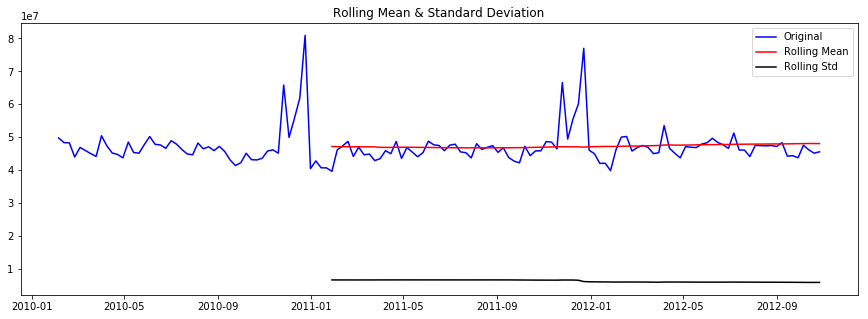

In [55]:
test_stationarity(ts)

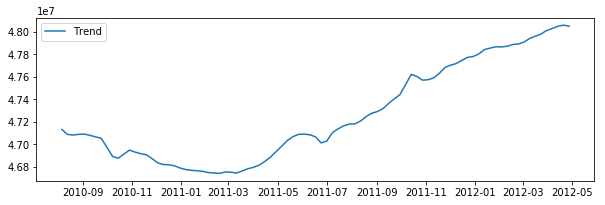

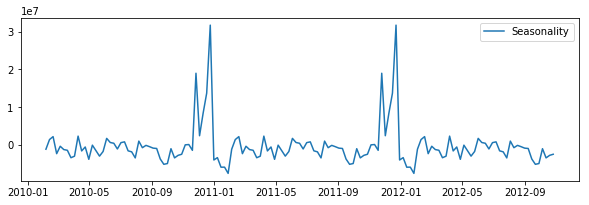

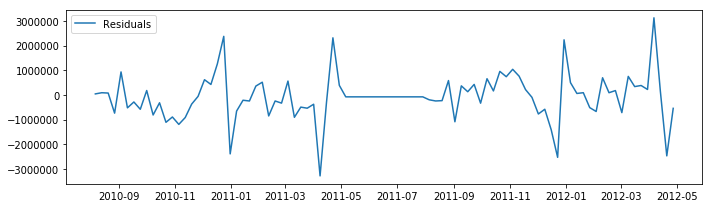

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,freq=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplots(figsize=(10,3))
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplots(figsize=(10,3))
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplots(figsize=(10,3))
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [58]:
def initial_plots(time_series, num_lag):
    plot_acf(time_series, lags = num_lag)
    plt.title('Autocorrelation plot')
    plot_pacf(time_series, lags = num_lag)
    plt.title('Partial autocorrelation plot')
    plt.show()

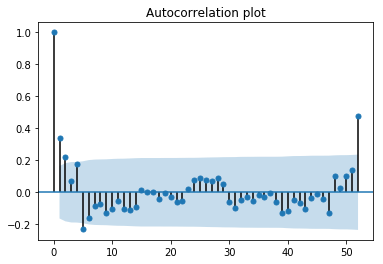

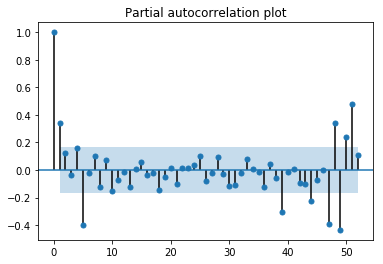

In [59]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
initial_plots(ts, 52)

In [69]:
train = ts.loc[:'2012-08-03']
test = ts.loc['2012-08-03':]

In [70]:
len(train), len(test)

(131, 13)

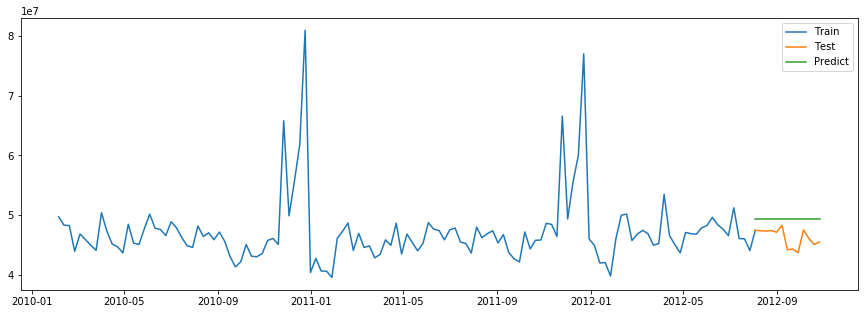

In [72]:
from statsmodels.tsa.api import SimpleExpSmoothing
train1=train.copy()
fit1=SimpleExpSmoothing(train1).fit(smoothing_level=1.4) 
p= fit1.forecast(len(test))
plt.figure(figsize=(15,5)) 
plt.plot(train, label='Train') 
plt.plot(test, label='Test') 
p.index=test.index
plt.plot(p, label='Predict') 
plt.legend(loc='best') 
#plt.title(print('RSS: ',np.sqrt((np.sum(np.square(test-p)))/len(test))))
plt.show() 

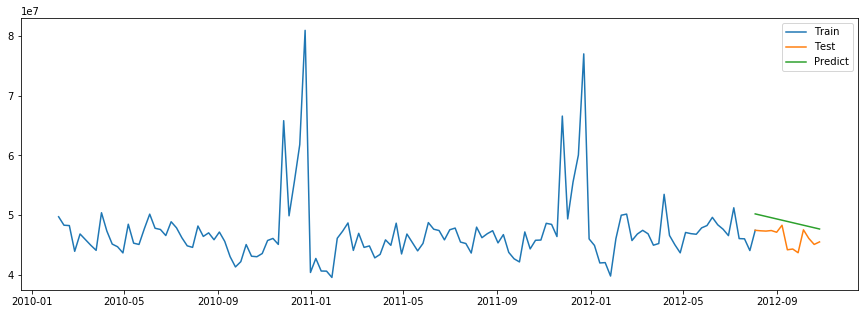

In [75]:
from statsmodels.tsa.api import Holt
train1=train.copy()
fit1=Holt(train1).fit(smoothing_level = 0.1,smoothing_slope = 0.5) 
p= fit1.forecast(len(test))
plt.figure(figsize=(15,5)) 
plt.plot(train, label='Train') 
plt.plot(test, label='Test') 
p.index=test.index
plt.plot(p, label='Predict') 
plt.legend(loc='best') 
#plt.title(print('RSS: ',np.sqrt((np.sum(np.square(test-p)))/len(test))))
plt.show() 

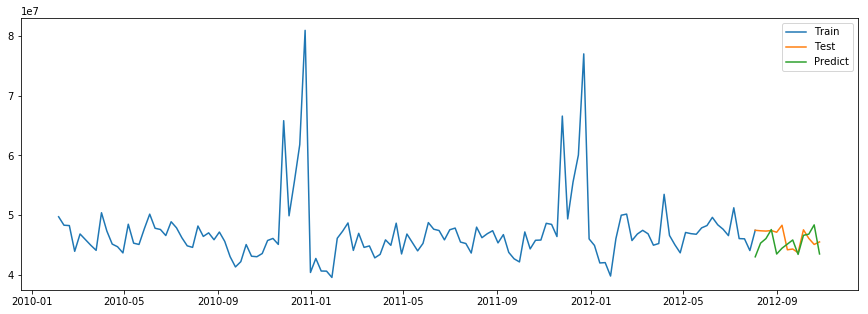

In [79]:
from statsmodels.tsa.api import ExponentialSmoothing
train1=train.copy()
fit1= ExponentialSmoothing(train1, seasonal_periods=12, trend='add', seasonal='add').fit()
p= fit1.forecast(len(test))
plt.figure(figsize=(15,5)) 
plt.plot(train, label='Train') 
plt.plot(test, label='Test') 
p.index=test.index
plt.plot(p, label='Predict') 
plt.legend(loc='best')
#plt.title(print('RSS: ',np.sqrt((np.sum(np.square(test-p)))/len(test))))
plt.show() 

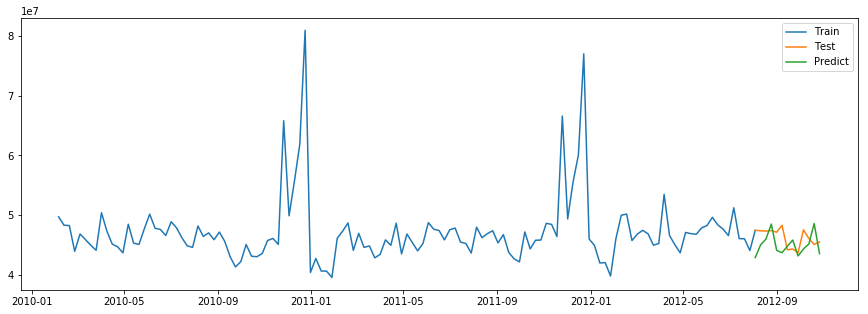

In [80]:
from pmdarima.arima import auto_arima
train1=train.copy()
stepwise_model = auto_arima(train1, start_p=1, start_q=1,max_p=3, 
                                max_q=3, m=12,start_P=0, seasonal=True,
                                d=1, D=1, trace=False,error_action='ignore',suppress_warnings=True, stepwise=True).fit(train1)
p=stepwise_model.predict(n_periods=len(test))
s=pd.Series(data=p,index=test.index)
plt.figure(figsize=(15,5)) 
plt.plot(train, label='Train') 
plt.plot(test, label='Test') 
plt.plot(s, label='Predict') 
plt.legend(loc='best') 
#plt.title(print('RSS: ',np.sqrt((np.sum(np.square(test-p)))/len(test))))
plt.show() 